In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196172 entries, 0 to 196171
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    196172 non-null  float64
 1   V1      196172 non-null  float64
 2   V2      196172 non-null  float64
 3   V3      196172 non-null  float64
 4   V4      196172 non-null  float64
 5   V5      196172 non-null  float64
 6   V6      196172 non-null  float64
 7   V7      196172 non-null  float64
 8   V8      196172 non-null  float64
 9   V9      196172 non-null  float64
 10  V10     196172 non-null  float64
 11  V11     196172 non-null  float64
 12  V12     196172 non-null  float64
 13  V13     196172 non-null  float64
 14  V14     196172 non-null  float64
 15  V15     196172 non-null  float64
 16  V16     196172 non-null  float64
 17  V17     196172 non-null  float64
 18  V18     196172 non-null  float64
 19  V19     196172 non-null  float64
 20  V20     196171 non-null  float64
 21  V21     19

<Axes: xlabel='Class', ylabel='count'>

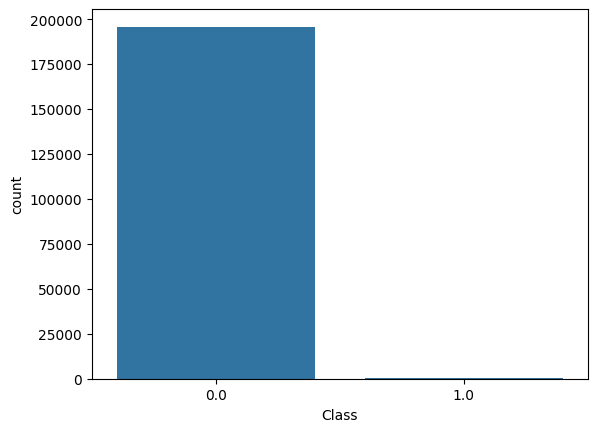

In [3]:
df.info()
df.describe()
df['Class'].value_counts()  # 0 = Legit, 1 = Fraud
sns.countplot(x='Class', data=df)

In [4]:
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])

In [7]:
X = df.drop(['Class', 'Time'], axis=1)
y = df['Class']

# Remove rows where target 'Class' is NaN
df = df[df['Class'].notna()]

# Then proceed as before
X = df.drop(['Class', 'Time'], axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [8]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     39159
         1.0       0.81      0.63      0.71        76

    accuracy                           1.00     39235
   macro avg       0.91      0.82      0.86     39235
weighted avg       1.00      1.00      1.00     39235



<Axes: >

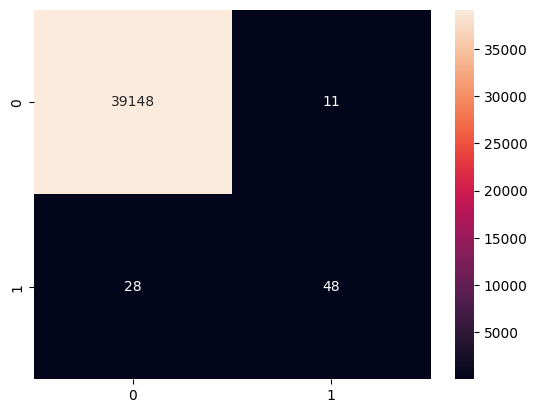

In [9]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

Text(0.5, 1.0, 'ROC Curve')

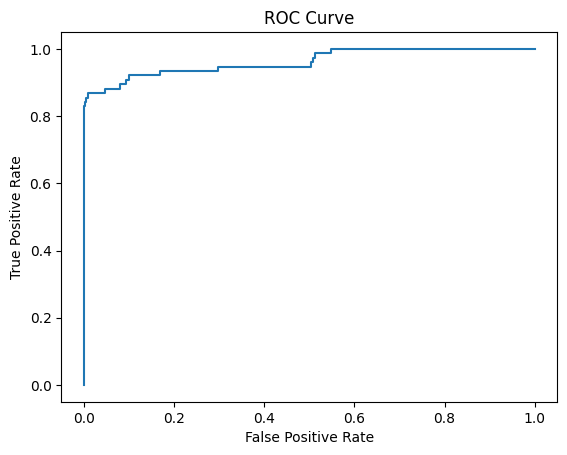

In [10]:
y_probs = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')